In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from TWA_Design_Tools import TWA_Design_Toolkit
from TWA_skrf_Toolkit import TWA_skrf_Toolkit as rftoolkit
import skrf as rf

In [2]:
# Enter the physical parameters of the antenna 
num_straps = 9
f0 = 96e6
w0 = 2*np.pi*f0
clight = 3e8
Rant = 1.12 # m, hfs of d3d

# See code logbook "my antenna" section. This is for shot 147634. 
n_par = -5 
k_par = w0*n_par/clight
print(f'k_par : {k_par} 1/m')
n_phi = Rant*k_par
print(f'n_phi: {n_phi}')

# settings to create the rf toolkit object 
capz0 = 9.3506
antz0 = 30
freqs_for_fullant = np.array([96, 97]) # MHz
capfile = 'circ_model/S11_cap_81to111MHz.csv'
antfile = 'circ_model/fixed_Smat_ant_96_and_97_deembed.csv'

myrfTWA = rftoolkit(num_straps=num_straps, f0=f0, k_par_max=k_par, capz0=capz0, 
                    antz0=antz0, freqs_for_fullant=freqs_for_fullant, capfile=capfile, antfile=antfile)

# add items to geometry
ar = 1.5e-2
d = 11e-2
s0 = 16e-2
wstrap = 8e-2
l = 15e-2
ts = 0.5e-2
tbox = 1e-2
h = .5e-2
t_cap_extend = 0.25e-2
wcap = wstrap + 2*t_cap_extend # 1 cm on either side
wcapbox = wcap + 2*h
tdiv = myrfTWA.geometry_dict['s_rez'] - 2*h - wcap 
dcap = ts + 2*t_cap_extend
dcapbox = dcap + 2*h
lcapbox = 10e-2
lcut = 6e-2
ldeembed = 5e-2
lfeed = 10e-2

myrfTWA.add_to_geometry('ar', ar)
myrfTWA.add_to_geometry('d', d)
myrfTWA.add_to_geometry('s0', s0)
myrfTWA.add_to_geometry('wstrap', wstrap)
myrfTWA.add_to_geometry('l', l)
myrfTWA.add_to_geometry('ts', ts)
myrfTWA.add_to_geometry('tbox', tbox)
myrfTWA.add_to_geometry('h', h)
myrfTWA.add_to_geometry('t_cap_extended', t_cap_extend)
myrfTWA.add_to_geometry('wcap', wcap)
myrfTWA.add_to_geometry('wcapbox', wcapbox)
myrfTWA.add_to_geometry('tdiv', tdiv)
myrfTWA.add_to_geometry('dcap', dcap)
myrfTWA.add_to_geometry('dcapbox', dcapbox)
myrfTWA.add_to_geometry('lcapbox', lcapbox)
myrfTWA.add_to_geometry('lcut', lcut)
myrfTWA.add_to_geometry('ldeembed', ldeembed)
myrfTWA.add_to_geometry('lfeed', lfeed)

myrfTWA.print_geometry()

k_par : -10.053096491487338 1/m
n_phi: -11.25946807046582
num_straps:     9
s_rez:          0.15625
lamda0:         3.1228381041666666
ar:             0.015
d:              0.11
s0:             0.16
wstrap:         0.08
l:              0.15
ts:             0.005
tbox:           0.01
h:              0.005
t_cap_extended: 0.0025
wcap:           0.085
wcapbox:        0.095
tdiv:           0.061249999999999985
dcap:           0.01
dcapbox:        0.02
lcapbox:        0.1
lcut:           0.06
ldeembed:       0.05
lfeed:          0.1


In [3]:
# test the cap models
capnet_test = myrfTWA.build_capnet_given_length(length=0.021,freqs=np.array([96,97]) ,filename=myrfTWA.capfile)
print(capnet_test.name)
Zcap, C = myrfTWA.print_znorm_and_capacitance(capnet_test, f=96, toprint=True)
Zcap, C = myrfTWA.print_znorm_and_capacitance(capnet_test, f=97, toprint=True)



l = 0.021
Zcap:(-0.0012613639774426047-289.5822924033037j), z0: [9.3506+0.j], Zcap/z0: [-0.0001349-30.96938083j]
C = 5.725018531974515 pF
Zcap:(-0.0012185696232601662-286.59623629126725j), z0: [9.3506+0.j], Zcap/z0: [-0.00013032-30.65003703j]
C = 5.725031948874873 pF


In [4]:
# test the antennas 

s1 = myrfTWA.get_ant_Smat_given_f(myrfTWA.antfile, f=97)
antnet_test = myrfTWA.build_antnet_chopped(freqs=np.array([96,97]), filename=myrfTWA.antfile)



In [5]:
# test full network given length
l = 0.03 
full_net_l = myrfTWA.get_fullant_given_one_length(l)
print(full_net_l.s)
myrfTWA.get_fullant_S11_S12_given_one_length(length=l, f=97)

[[[0.93971668+0.34068827j 0.00243117-0.00670537j]
  [0.00243208-0.00670462j 0.93952541+0.34121594j]]

 [[0.94913684+0.31345113j 0.00262178-0.00793722j]
  [0.00262286-0.00793681j 0.94895208+0.3140126j ]]]


((0.9491368388856196+0.31345113370585187j),
 (0.002621781869776881-0.007937221657426016j))

In [6]:
# now, try building the full network form a given capacitance 

C = 5.365672663526817e-12 # F
full_net_C = myrfTWA.get_fullant_given_C_via_caps(C)
print(full_net_C.s)
myrfTWA.get_fullant_S11_S12_given_C(C=C, f=96)

[[[8.92182647e-01+0.45078225j 8.62500386e-04-0.00170865j]
  [8.62548645e-04-0.00170793j 8.92010006e-01+0.45112473j]]

 [[9.02022859e-01+0.43074812j 8.99786670e-04-0.00188592j]
  [8.99898014e-04-0.00188534j 9.01854657e-01+0.43110206j]]]


((0.8921826465636253+0.4507822505686716j),
 (0.0008625003858724776-0.0017086507753321465j))

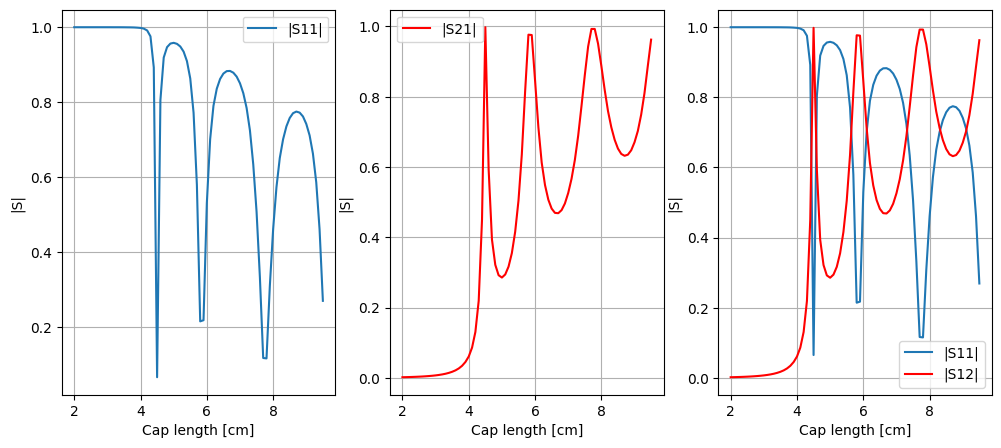

In [8]:
# okay, things look like they are working!! 
ls = np.arange(0.02, 0.096, 0.001)
myrfTWA.plot_abs_S11_S21_l_scan(ls, f=96)
